<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cargar datos</a></span></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis exploratorio</a></span><ul class="toc-item"><li><span><a href="#Tipo-de-datos" data-toc-modified-id="Tipo-de-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tipo de datos</a></span></li><li><span><a href="#Selección-inicial-de-variables" data-toc-modified-id="Selección-inicial-de-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Selección inicial de variables</a></span></li><li><span><a href="#División-del-dataframe" data-toc-modified-id="División-del-dataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>División del dataframe</a></span></li><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Valores nulos</a></span></li></ul></li><li><span><a href="#Análisis-estadístico" data-toc-modified-id="Análisis-estadístico-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis estadístico</a></span><ul class="toc-item"><li><span><a href="#Análisis-de-la-variable-dependiente-o-target" data-toc-modified-id="Análisis-de-la-variable-dependiente-o-target-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Análisis de la variable dependiente o <em>target</em></a></span></li><li><span><a href="#Análisis-de-las-variables-independientes-o-pedictores" data-toc-modified-id="Análisis-de-las-variables-independientes-o-pedictores-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Análisis de las variables independientes o <em>pedictores</em></a></span><ul class="toc-item"><li><span><a href="#Variables-Categóricas" data-toc-modified-id="Variables-Categóricas-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Variables Categóricas</a></span></li><li><span><a href="#Variables-Numéricas" data-toc-modified-id="Variables-Numéricas-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Variables Numéricas</a></span></li></ul></li><li><span><a href="#Análisis-de-correlaciones-y-selección-de-variables" data-toc-modified-id="Análisis-de-correlaciones-y-selección-de-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Análisis de correlaciones y selección de variables</a></span></li></ul></li><li><span><a href="#Muestreo" data-toc-modified-id="Muestreo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Muestreo</a></span></li><li><span><a href="#Modelos" data-toc-modified-id="Modelos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelos</a></span><ul class="toc-item"><li><span><a href="#Regresión-Logística" data-toc-modified-id="Regresión-Logística-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Regresión Logística</a></span><ul class="toc-item"><li><span><a href="#Entrenamiento" data-toc-modified-id="Entrenamiento-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Entrenamiento</a></span></li><li><span><a href="#Evaluación-del-modelo" data-toc-modified-id="Evaluación-del-modelo-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Evaluación del modelo</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Aplicación-a-los-datos-predict" data-toc-modified-id="Aplicación-a-los-datos-predict-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Aplicación a los datos predict</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

<h1>PQL Classificaiton Model<span class="tocSkip"></span></h1>
<h2>Laura Oliva Trastoy<span class="tocSkip"></span></h2>

# Librerías <span class="tocSkip">

In [1]:
# Librerías para el tratamiento de los datos:
# ----------------------------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from pandas import Int64Index as NumericIndex  

# Librerías para la realización de gráficos:
# ----------------------------------------------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

# Librerías para el procesado y modelado de los datos:
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree


import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

import pickle

from collections import Counter

# Configuración de los warnings:
import warnings
warnings.filterwarnings('ignore')

C:\Users\Laura\AppData\Local\Temp/ipykernel_28028/2235385136.py:5: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\Laura\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Cargar datos

In [2]:
# Antes de nada, definimos nuestra semilla:

SEED = 50

In [3]:
# Para leer un archivo excel, primero hemos tenido que instalar el paquete Openpyxl en conda. 
df = pd.read_excel('data_PQL.xlsx', header = 0)

#verificamos que se han leído todas las filas y columnas. 
df.shape

(282, 308)

Vemos que tenemos un número muy pequeño de registros, pero en cambio un número muy elevado de variables. Por ello, tras realizar el análisis exploratorio, probablemente habremos de seleccionar algunas variables y descartar otras de entre todas las variables independientes para nuestros modelos. 

# Análisis exploratorio

## Tipo de datos

In [4]:
# Miramos cuántos datos tenemos y qué columnas tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Columns: 308 entries, starts_2day to id
dtypes: bool(1), float64(260), int64(43), object(4)
memory usage: 676.8+ KB


* Hay tantas columnas que ni siquiera nos las muestra todas, por lo que vamos a tener que dividir el dataframe para poder hacer el análisis exploratorio. 
* Vemos que tenemos 4 variables categóricas, 1 boleana, y todo lo demás numéricas. 
* No obstante, de momento vemos que hay una columna *id*, y que parece estar la última. Vamos a ponerla como índice.

In [5]:
# Establecemos la columna "id" como índice y comprobamos que ha funcionado
df = df.set_index('id')
df

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,...,countsum_RUNTIME_EXCEPTION,countsum_USER_ERROR,countsum_OPERATOR_EXCEPTION,countsum_STOPPED,failure_ratio,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio,IsWon
id,,,,,,,,,,,,,,,,,,,,,
1,15,17,17,18,18,18,19,19,19,19,...,7.0,9.0,5.0,24.0,0.021021,0.007007,0.009009,0.005005,0.024024,True
2,4,4,4,4,4,4,4,4,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,2,3,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
6,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2,4,4,10,10,13,15,22,22,26,...,0.0,14.0,0.0,1.0,0.018642,0.000000,0.018642,0.000000,0.001332,True
328,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
329,4,7,7,9,12,14,14,14,14,15,...,10.0,13.0,0.0,0.0,0.072100,0.031348,0.040752,0.000000,0.000000,False


In [6]:
#Ahora ajustamos un parámetro de pandas para poder todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,starts_22day,starts_24day,starts_26day,starts_28day,starts_30day,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,starts_24day_Delta,starts_26day_Delta,starts_28day_Delta,starts_30day_Delta,FormC,VisitC,WebinarC,EventC,Form HandlerC,Landing PageC,Landing Page TrackerC,Page ViewC,Chat TranscriptC,Form TrackerC,Social Post ClickC,Paid Search AdC,VideoC,country,industry,job_function,job_title,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data,countsum_pivot,countsum_radoop_extension,countsum_remove_attribute_range,countsum_remove_useless_attributes,countsum_rename,countsum_rename_by_generic_names,countsum_rename_by_replacing,countsum_replace_missing_values,countsum_sample,countsum_sample_stratified,countsum_select,countsum_select_subprocess,countsum_set_macro,countsum_set_parameters,countsum_sort,countsum_split_data,countsum_subprocess,countsum_support_vector_clustering,countsum_transpose,countsum_weight_related,countsum_x_prediction,countsum_compare_rocs,countsum_date_to_numerical,countsum_detect_outlier_cof,countsum_detect_outlier_densities,countsum_detect_outlier_distances,countsum_detect_outlier_lof,countsum_drop_uncertain_predictions,countsum_execute_process,countsum_group_models,countsum_intersect,countsum_replace,countsum_split_validation,countsum_store,countsum_support_vector_machine,countsum_trim,countsum_chaid,countsum_generate_nominal_data,countsum_jdbc_connectors_extension,countsum_apply_threshold,countsum_combine_performances,countsum_create_lift_chart,countsum_create_threshold,countsum_find_threshold,countsum_principal_component_analysis,countsum_rule_induction,countsum_sample_kennard_stone,countsum_select_recall,countsum_set_minus,countsum_date_to_nominal,countsum_stream_database,countsum_com.aylien.textapi.rapidminer_extension,countsum_generate_churn_data,countsum_generate_multi_label_data,countsum_social_media_extension,countsum_text_extension,countsum_web_extension,countsum_weka_extension,countsum_anova,countsum_extract_performance,countsum_linear_discriminant_analysis,countsum_logistic_regression,countsum_naive_bayes_kernel,countsum_perceptron,countsum_performance_classification,countsum_quadratic_discriminant_analysis,countsum_regularized_discriminant_analysis,countsum_correlation_matrix,countsum_create_association_rules,countsum_fp_growth,countsum_productivity_extension,countsum_sample_bootstrapping,countsum_auto_mlp,countsum_bootstrapping_validation,countsum_de_pivot,countsum_discretize_by_bins,countsum_guess_types,countsum_k_medoids,countsum_neural_net,countsum_performance_regressio

Vemos que: 
* Tenemos una serie de columnas que reflejan el acumulado de las veces que cada usuario ha abierto el programa, en rangos de dos días, durante un mes, desde *starts_2day* hasta *starts_30day*. 
* *starts_30day* pare ser el número total de veces que cada usuario ha abierto el programa durante el mes.
* Las columnas *(...)_Delta* reflejan el recuento de veces que el usuario ha abierto el programa, en lugar del acumulado.
    * No necesitamos las columnas que reflejan recuentos de interacciones, puesto que tenemos los acumulados. 
    * Por tanto, vamos a eliminar estas columnas.
* Desde *FormC* hasta *Paid Search AdC* parece que tenemos las interacciones que ha tenido cada usuario con la web. 
* Desde *country* hasta *job_title* tenemos información personal de los usuarios, y son las variables categóricas.
* Todas las que se llaman *contsum(...)*, que son la mayoría, parecen interacciones del usuario con el programa. 
    * Parece que muchas tienen valores nulos o 0, vamos a explorarlas para ver si hay alguna que podamos eliminar. 
* Las que se llaman *(...)_ratio* parecen métricas de performance del programa. 
* Y por último tenemos nuestra variable target, *IsWon*, que ya podemos ver que es un booleano. 
* Hay muchos ceros en nuestro dataframe. Eliminaremos las variables cuyo máximo sea cero: puesto que nuestros datos son datos de comportamiento del usuario, no es posible tener valores negativos (y si los hubiere, sería un error), y por tanto, si el máximo de una variable es cero, eso significa que o todos los valores son cero, o todos son ceros y nulos. Si los valores de una variable son siempre iguales para todos los usuarios (cero o nulo), entonces esa variable no aportará valor predictivo al modelo, puesto que todos los usuarios habrían tenido el mismo comportamiento. 

Así, parece que hay algunas columnas que podemos quitar, y que tendremos que dividir el dataframe en secciones para poder abordar mejor todo el tratamiento de datos. 


## Selección inicial de variables

In [7]:
# Antes de quitar las variables de recuento, y por si acaso las necesitaramos, las metemos en una variable. 
deltas = df.loc[:,df.columns.str.endswith('_Delta')].copy()
deltas

,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,starts_24day_Delta,starts_26day_Delta,starts_28day_Delta,starts_30day_Delta
id,,,,,,,,,,,,,,
1,2,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2,0,6,0,3,2,7,0,4,2,2,0,2,0
328,0,0,0,0,0,0,0,0,0,0,0,0,0,0
329,3,0,2,3,2,0,0,0,1,0,1,0,1,6


In [8]:
# Ahora las quitamos, y vemos que tenemos 14 columnas menos. 
df = df.drop(deltas, axis=1)
df.shape

(282, 293)

In [9]:
# Buscamos las variables cuyo máximo es cero y las asignamos a una lista, para luego eliminarlas del dataframe.

columns_zero = []
for col in df:
    if df[col].max() == 0:
        columns_zero.append(col)

columns_zero

['Paid Search AdC',
 'VideoC',
 'countsum_stream_database',
 'countsum_generate_churn_data',
 'countsum_generate_multi_label_data',
 'countsum_generate_concatenation',
 'countsum_denormalize']

In [10]:
# Tenemos 7 variables que podemos eliminar. 
df = df.drop(columns_zero, axis = 1)
df.shape

(282, 286)

## División del dataframe

Antes de seguir, vamos a dividir el dataframe para que sea más fácil de manejar. Lo haremos en base al tipo de información a que se refiere cada columna (nº de veces que el usuario ha usado el programa, interacciones con la web, interacciones con el programa, métricas de rendimiento, e información personal).


In [11]:
# Dividimos el dataframe

columns_accumulate = df.loc[:, df.columns.str.startswith('starts_')].copy()
columns_web = df.loc[:, df.columns.str.endswith('C')].copy()
columns_personal = df.select_dtypes(include = ['object']).copy()
columns_software = df.loc[:, df.columns.str.startswith('countsum')].copy()
columns_performance = df.loc[:, df.columns.str.endswith('_ratio')].copy()

In [12]:
# Verificamos que las tenemos todos los datos, excepto la variable target

print('dataframe shape, including target: ', df.shape)
print('accumulates shape: ', columns_accumulate.shape)
print('web shape: ', columns_web.shape)
print('personal shape: ', columns_personal.shape)
print('software shape: ', columns_software.shape)
print('performace_shape: ', columns_performance.shape)

dataframe shape, including target:  (282, 286)
accumulates shape:  (282, 15)
web shape:  (282, 11)
personal shape:  (282, 4)
software shape:  (282, 250)
performace_shape:  (282, 5)


In [13]:
# El subconjunto de datos de interacción con el progama sigue siendo teniendo demasiadas columnas para ser manejable. 
# Vamos a dividirlo en 5, para tener 5 subconjuntos de 50 variables. 

software1 = columns_software.iloc[:, :50]
software2 = columns_software.iloc[:, 50:100]
software3 = columns_software.iloc[:, 100:150]
software4 = columns_software.iloc[:, 150:200]
software5 = columns_software.iloc[:, 200:250]

print('software1 shape: ', software1.shape)
print('software2 shape: ', software2.shape)
print('software3 shape: ', software3.shape)
print('software4 shape: ', software4.shape)
print('software5 shape: ', software5.shape)

software1 shape:  (282, 50)
software2 shape:  (282, 50)
software3 shape:  (282, 50)
software4 shape:  (282, 50)
software5 shape:  (282, 50)


## Valores nulos

Vamos a analizar los valores nulos en cada subconjunto del dataframe por separado.

In [14]:
# Miramos si nuestra variable dependiente tiene nulos
df['IsWon'].isna().sum()

0

In [15]:
# Miramos todos los subconjuntos excepto los de software
print('\n Registros nulos subconjunto accumulate: \n ', columns_accumulate.isnull().sum())
print('\n Registros nulos subconjunto web: \n', columns_web.isnull().sum())
print('\n Registros nulos subconjunto personal: \n', columns_personal.isnull().sum())
print('\n Registros nulos subconjunto performance: \n', columns_performance.isnull().sum())



 Registros nulos subconjunto accumulate: 
  starts_2day     0
starts_4day     0
starts_6day     0
starts_8day     0
starts_10day    0
starts_12day    0
starts_14day    0
starts_16day    0
starts_18day    0
starts_20day    0
starts_22day    0
starts_24day    0
starts_26day    0
starts_28day    0
starts_30day    0
dtype: int64

 Registros nulos subconjunto web: 
 FormC                    0
VisitC                   0
WebinarC                 0
EventC                   0
Form HandlerC            0
Landing PageC            0
Landing Page TrackerC    0
Page ViewC               0
Chat TranscriptC         0
Form TrackerC            0
Social Post ClickC       0
dtype: int64

 Registros nulos subconjunto personal: 
 country         0
industry        0
job_function    0
job_title       0
dtype: int64

 Registros nulos subconjunto performance: 
 failure_ratio               192
runtime_exception_ratio     192
user_error_ratio            192
operator_exception_ratio    192
stopped_ratio            

In [16]:
# Mismo proceso con los subconjuntos de interacciones en el software

print('\n Registros nulos subconjunto software1: \n', software1.isnull().sum())
print('\n Registros nulos subconjunto software2: \n', software2.isnull().sum())
print('\n Registros nulos subconjunto software3: \n', software3.isnull().sum())
print('\n Registros nulos subconjunto software4: \n', software4.isnull().sum())
print('\n Registros nulos subconjunto software5: \n', software5.isnull().sum())


 Registros nulos subconjunto software1: 
 countsum_retrieve                                192
countsum_apply_model                             192
countsum_filter_examples                         192
countsum_join                                    192
countsum_nominal_conversion                      192
countsum_numerical_conversion                    192
countsum_parallel_decision_tree                  192
countsum_performance                             192
countsum_read_data_operators                     192
countsum_remove_duplicates                       192
countsum_select_attributes                       192
countsum_set_role                                192
countsum_union                                   192
countsum_write_data_operators                    192
countsum_x_validation                            192
countsum_decision_tree                           192
countsum_filter_example_range                    192
countsum_multiply                                192
cou

Tanto las columnas relativas a las interacciones con el software, una vez abierto, como las relativas a la performance del mismo tienen el mismo número de registros nulos: 192. Se entiende que representan a 192 usuarios que no dieron consentimiento para trackear su comportamiento dentro del programa, o a los que no se pudo rastrear por algún motivo. Aun así, son demasiados registros nulos en un dataset ya de por sí pequeño, por lo que vamos a reemplazar los valores nulos. Para ello, primero miraremos los estadísticos de las columnas, para así decidir qué valor otorgamos a los registros nulos. 

In [17]:
# Estadísticos de las columnas de performance del software
columns_performance.describe()

,failure_ratio,runtime_exception_ratio,user_error_ratio,operator_exception_ratio,stopped_ratio
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.122341,0.010977,0.206589,0.003063,0.023331
std,0.380674,0.042552,0.934391,0.023506,0.119812
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009584,0.000000,0.008867,0.000000,0.000000
50%,0.033630,0.000000,0.030360,0.000000,0.000000
75%,0.085217,0.004511,0.079157,0.000000,0.003075
max,3.333333,0.333333,8.333333,0.222222,0.833333


In [18]:
# Estadísticos de las columnas de interacciones con el software
software1.describe()

,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,52.833333,21.966667,39.900000,37.133333,6.388889,2.111111,4.633333,8.311111,15.377778,6.488889,38.800000,33.422222,2.222222,3.233333,12.088889,4.988889,3.133333,19.788889,0.044444,27.744444,3.055556,2.833333,0.177778,0.300000,0.077778,2.188889,1.077778,0.022222,12.622222,1.977778,40.022222,1.833333,0.533333,1.644444,5.277778,2.333333,0.077778,2.455556,5.511111,5.733333,1.766667,0.733333,3.744444,5.922222,4.444444,1.322222,1.744444,0.166667,2.033333,0.766667
std,113.757109,48.331359,107.807678,128.930188,25.057549,6.364304,9.950947,21.487203,39.785825,26.249128,113.253142,93.072399,13.726688,12.921587,27.778678,11.227469,16.211523,49.258660,0.421637,93.888717,18.508037,12.472216,1.303218,2.637031,0.455374,13.520600,7.811297,0.210819,60.046719,12.878846,138.222584,12.188823,1.736586,6.095331,22.814360,10.756759,0.640010,8.161517,15.984012,23.747170,5.564837,2.655501,29.892903,22.603186,17.553841,4.682810,14.854773,0.902556,5.069073,2.157037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [19]:
software2.describe()

,countsum_pivot,countsum_radoop_extension,countsum_remove_attribute_range,countsum_remove_useless_attributes,countsum_rename,countsum_rename_by_generic_names,countsum_rename_by_replacing,countsum_replace_missing_values,countsum_sample,countsum_sample_stratified,countsum_select,countsum_select_subprocess,countsum_set_macro,countsum_set_parameters,countsum_sort,countsum_split_data,countsum_subprocess,countsum_support_vector_clustering,countsum_transpose,countsum_weight_related,countsum_x_prediction,countsum_compare_rocs,countsum_date_to_numerical,countsum_detect_outlier_cof,countsum_detect_outlier_densities,countsum_detect_outlier_distances,countsum_detect_outlier_lof,countsum_drop_uncertain_predictions,countsum_execute_process,countsum_group_models,countsum_intersect,countsum_replace,countsum_split_validation,countsum_store,countsum_support_vector_machine,countsum_trim,countsum_chaid,countsum_generate_nominal_data,countsum_jdbc_connectors_extension,countsum_apply_threshold,countsum_combine_performances,countsum_create_lift_chart,countsum_create_threshold,countsum_find_threshold,countsum_principal_component_analysis,countsum_rule_induction,countsum_sample_kennard_stone,countsum_select_recall,countsum_set_minus,countsum_date_to_nominal
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,6.555556,0.022222,0.966667,1.944444,18.522222,0.100000,9.433333,16.255556,2.822222,0.866667,0.522222,0.133333,0.433333,0.255556,8.188889,7.633333,27.433333,0.044444,0.277778,1.111111,0.766667,0.666667,2.866667,0.077778,0.222222,2.844444,0.144444,0.055556,3.744444,1.155556,0.066667,10.377778,2.744444,7.200000,2.166667,4.655556,0.522222,0.200000,0.288889,0.266667,0.055556,0.800000,0.111111,0.088889,0.466667,0.588889,0.022222,0.088889,1.522222,0.944444
std,20.954799,0.148231,6.017671,5.591649,53.862961,0.671239,44.700514,35.809283,12.254399,3.757240,2.394881,1.072642,1.716084,0.786988,22.254349,27.777790,80.062062,0.255770,1.878487,2.358082,5.092515,4.711926,16.143458,0.640010,1.549032,19.559710,0.868437,0.433463,30.030906,6.229526,0.632456,38.770016,9.934121,22.157861,9.106424,25.591941,3.644999,1.399839,1.093848,1.505048,0.527046,3.069238,0.953344,0.489082,2.404116,2.151009,0.210819,0.843274,9.373915,6.413401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [20]:
software3.describe()

,countsum_com.aylien.textapi.rapidminer_extension,countsum_social_media_extension,countsum_text_extension,countsum_web_extension,countsum_weka_extension,countsum_anova,countsum_extract_performance,countsum_linear_discriminant_analysis,countsum_logistic_regression,countsum_naive_bayes_kernel,countsum_perceptron,countsum_performance_classification,countsum_quadratic_discriminant_analysis,countsum_regularized_discriminant_analysis,countsum_correlation_matrix,countsum_create_association_rules,countsum_fp_growth,countsum_productivity_extension,countsum_sample_bootstrapping,countsum_auto_mlp,countsum_bootstrapping_validation,countsum_de_pivot,countsum_discretize_by_bins,countsum_guess_types,countsum_k_medoids,countsum_neural_net,countsum_performance_regression,countsum_polynomial_regression,countsum_provide_macro_as_log_value,countsum_r_extension,countsum_random_forest,countsum_recall,countsum_remember,countsum_remove_correlated_attributes,countsum_replace_dictionary,countsum_series_extension,countsum_set_data,countsum_support_vector_machine_libsvm,countsum_top_down_clustering,countsum_agglomerative_clustering,countsum_default_model,countsum_decision_tree_multiway,countsum_random_clustering,countsum_adaboost,countsum_classification_by_regression,countsum_free_memory,countsum_impute_missing_values,countsum_materialize_data,countsum_text_to_nominal,countsum_declare_missing_value
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.033333,0.011111,0.788889,0.066667,0.788889,0.022222,0.433333,0.355556,1.088889,0.344444,0.177778,5.288889,0.033333,0.044444,2.188889,1.333333,1.666667,0.600000,0.033333,0.011111,0.233333,0.188889,1.800000,0.866667,0.266667,2.300000,3.677778,0.088889,0.044444,0.688889,1.133333,0.555556,0.355556,1.111111,0.488889,0.177778,0.311111,0.933333,0.011111,0.133333,0.144444,0.333333,0.488889,0.255556,0.300000,0.233333,0.100000,0.077778,0.111111,0.466667
std,0.316228,0.105409,1.887239,0.469281,5.965245,0.148231,3.798433,1.552896,4.043706,3.058093,1.583466,19.991147,0.234641,0.332208,9.971752,6.727438,7.143788,4.289522,0.316228,0.105409,2.213594,1.140613,12.148149,5.761554,1.404647,9.897736,24.241680,0.386411,0.332208,5.265202,9.805066,3.345670,2.304422,6.373126,3.285119,0.696343,2.846817,5.844040,0.105409,0.876664,0.663005,2.747829,3.554533,1.923019,2.068762,1.506913,0.948683,0.455374,0.549657,2.926823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [21]:
software4.describe()

,countsum_create_formula,countsum_generate_transaction_data,countsum_set_macros,countsum_adjust_date,countsum_work_on_subset,countsum_decision_stump,countsum_remap_binominals,countsum_rainflow_matrix,countsum_fast_k_means,countsum_logistic_regression_evolutionary,countsum_sort_by_pareto_rank,countsum_support_vector_machine_linear,countsum_discretize_by_frequency,countsum_k_means_kernel,countsum_performance_attribute_count,countsum_performance_support_vector_count,countsum_visualize_model_by_som,countsum_shuffle,countsum_cartesian_product,countsum_execute_program,countsum_execute_script,countsum_fill_data_gaps,countsum_python_scripting_extension,countsum_r_scripting_extension,countsum_replace_infinite_values,countsum_t_test,countsum_add_noise,countsum_advanced_file_connectors_extension,countsum_generate_direct_mailing_data,countsum_parallel_random_forest,countsum_quantx1_extension,countsum_rescale_confidences,countsum_single_rule_induction_single_attribute,countsum_format_numbers,countsum_execute_sql,countsum_data_to_similarity,countsum_copy_repository_entry,countsum_collect,countsum_flatten_collection,countsum_split,countsum_anomalydetection_extension,countsum_clear_log,countsum_cluster_density_performance,countsum_cross_distances,countsum_dummy,countsum_expectation_maximization_clustering,countsum_extract_prototypes,countsum_featselext_extension,countsum_flatten_clustering,countsum_gaussian_process
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.011111,0.133333,0.055556,0.111111,0.188889,0.244444,0.488889,0.011111,0.70000,0.011111,0.044444,0.077778,0.866667,0.355556,0.011111,0.022222,0.244444,0.022222,1.211111,0.511111,0.033333,0.022222,0.877778,3.255556,0.011111,0.344444,0.055556,0.100000,0.244444,0.422222,0.033333,0.011111,0.011111,0.111111,0.166667,0.255556,0.011111,0.733333,2.122222,0.011111,0.122222,0.011111,0.033333,0.011111,0.155556,0.188889,0.222222,0.055556,0.111111,0.022222
std,0.105409,1.264911,0.433463,0.741157,1.505753,1.623639,2.062204,0.105409,4.03482,0.105409,0.255770,0.455374,5.898391,2.865177,0.105409,0.210819,1.737305,0.210819,11.489609,4.743403,0.316228,0.210819,8.221413,29.625210,0.105409,3.162850,0.274828,0.703922,1.909827,2.990539,0.234641,0.105409,0.105409,0.953344,1.008392,1.328690,0.105409,6.747118,20.133168,0.105409,1.159502,0.105409,0.316228,0.105409,1.475730,1.314521,1.816143,0.527046,0.953344,0.148231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [22]:
software5.describe()

,countsum_item_distribution_performance,countsum_join_paths,countsum_singular_value_decomposition,countsum_dtw_extension,countsum_id3,countsum_parallel_extension,countsum_generate_sales_data,countsum_subgroup_discovery,countsum_open_file,countsum_add_entry_to_archive_file,countsum_annotate,countsum_create_archive_file,countsum_cut,countsum_handle_exception,countsum_map,countsum_performance_costs,countsum_publish_to_app,countsum_recall_from_app,countsum_send_mail,countsum_solr_extension,countsum_throw_exception,countsum_update_database,countsum_bagging,countsum_discretize_by_entropy,countsum_generalized_sequential_patterns,countsum_local_polynomial_regression,countsum_seemingly_unrelated_regression,countsum_vector_linear_regression,countsum_hyper_hyper,countsum_anova_matrix,countsum_performance_min_max,countsum_self_organizing_map,countsum_wrapper_x_validation,countsum_paren_extension,countsum_pmml_extension,countsum_reporting_extension,countsum_x_means,countsum_tree_to_rules,countsum_vote,countsum_random_tree,countsum_wordnet_extension,countsum_covariance_matrix,countsum_mututal_information_matrix,countsum_relevance_vector_machine,countsum_EXECUTE,countsum_FAILURE,countsum_RUNTIME_EXCEPTION,countsum_USER_ERROR,countsum_OPERATOR_EXCEPTION,countsum_STOPPED
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.066667,0.011111,0.466667,0.011111,0.044444,3.011111,0.455556,0.111111,0.066667,0.011111,0.022222,0.011111,0.144444,0.077778,0.188889,0.133333,0.066667,0.966667,0.022222,0.655556,0.077778,0.188889,0.044444,0.033333,0.011111,0.011111,0.011111,0.022222,0.011111,0.022222,0.011111,0.011111,0.011111,0.111111,0.033333,1.566667,0.022222,0.188889,0.011111,0.011111,0.011111,0.044444,0.022222,0.011111,612.833333,15.644444,1.522222,14.433333,0.244444,2.544444
std,0.632456,0.105409,3.909654,0.105409,0.332208,28.459510,3.061765,1.054093,0.444694,0.105409,0.210819,0.105409,1.370320,0.737865,1.791957,1.264911,0.632456,9.170605,0.210819,6.219146,0.737865,1.791957,0.207235,0.234641,0.105409,0.105409,0.105409,0.148231,0.105409,0.148231,0.105409,0.105409,0.105409,1.054093,0.316228,13.521560,0.148231,1.688656,0.105409,0.105409,0.105409,0.255770,0.210819,0.105409,1115.891534,18.583133,3.191378,16.984494,0.783411,8.194491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.250000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Vemos que, casi invariablemente, la desviación típica es mayor que la media, lo que significa que en casi todas las variables o bien tenemos datos extremos, muy alejados de la media, o bien, seguro, una distribución no normal. En el mismo sentido, en muchas variables las medias y las mediana tienen valores muy alejados, debido a que en éstas existen valores atípicamente altos: la distancia entre el percentil 75 y el valor máximo de la variable es mucho más grande que entre el percentil 75 y la media. Esto nos indica que, efectivamente, tenemos valores extremos por el límite superior. 

Por tanto, y dado que tenemos muchos valores nulos, decidimos guardar una copia del dataframe con los valores reemplazados por la **mediana** de su respectiva columna: ante una distribución no normal, la mediana es un estadístico más robusto de tendencia central que la media, puesto que representa exactamente el percentil 50, independientemente de los valores extremos de la muestra. Asimismo, en distirbuciones normales la mediana ya la media son equivalentes, por lo que no supondrá problema reemplazar todas las variables por la mediana. 

In [23]:
# Reemplazamos los valores nulos por la mediana en el subconjunto de datos de performance

columns_performance = columns_performance.fillna(columns_performance.median())
columns_performance.isna().sum()

failure_ratio               0
runtime_exception_ratio     0
user_error_ratio            0
operator_exception_ratio    0
stopped_ratio               0
dtype: int64

In [24]:
# En los subconjuntos de datos de interacciones con el software

software1 = software1.fillna(software1.median())
software2 = software2.fillna(software2.median())
software3 = software3.fillna(software3.median())
software4 = software4.fillna(software4.median())
software5 = software5.fillna(software5.median())

print('\n Registros nulos subconjunto software1: \n', software1.isnull().sum())
print('\n Registros nulos subconjunto software2: \n', software2.isnull().sum())
print('\n Registros nulos subconjunto software3: \n', software3.isnull().sum())
print('\n Registros nulos subconjunto software4: \n', software4.isnull().sum())
print('\n Registros nulos subconjunto software5: \n', software5.isnull().sum())


 Registros nulos subconjunto software1: 
 countsum_retrieve                                0
countsum_apply_model                             0
countsum_filter_examples                         0
countsum_join                                    0
countsum_nominal_conversion                      0
countsum_numerical_conversion                    0
countsum_parallel_decision_tree                  0
countsum_performance                             0
countsum_read_data_operators                     0
countsum_remove_duplicates                       0
countsum_select_attributes                       0
countsum_set_role                                0
countsum_union                                   0
countsum_write_data_operators                    0
countsum_x_validation                            0
countsum_decision_tree                           0
countsum_filter_example_range                    0
countsum_multiply                                0
countsum_namsor_extension              

In [25]:
# Y en el dataframe que conservamos entero

df_median = df.fillna(df.median()).copy()
df_median.isnull().sum()

starts_2day                 0
starts_4day                 0
starts_6day                 0
starts_8day                 0
starts_10day                0
                           ..
runtime_exception_ratio     0
user_error_ratio            0
operator_exception_ratio    0
stopped_ratio               0
IsWon                       0
Length: 286, dtype: int64

# Análisis estadístico

Ahora que no tenemos nulos, vamos a continuar el proceso de feature engeenering realizando análisis estadísticos de las variables con mayor profundidad. 

## Análisis de la variable dependiente o *target*

In [26]:
# Antes hemos visto que nuestra variable respuesta se IsWon, y que es un booleano

df_median['IsWon'].head()

id
1     True
2    False
3    False
5     True
6     True
Name: IsWon, dtype: bool

In [27]:
# Vamos a pasarla a columna númerica:  
# 0 será la clase negativa: usuarios que no compraron el producto
# 1 será la clase positiva: usuarios que sí comprarons el producto

df_median.loc[df['IsWon'] == False, 'target'] = 0
df_median.loc[df['IsWon'] == True, 'target'] = 1

print(df_median['target'].head())
print(df_median.shape)

id
1    1.0
2    0.0
3    0.0
5    1.0
6    1.0
Name: target, dtype: float64
(282, 287)


In [28]:
# Eliminamos la columna original IsWon de la copia del dataset y vemos la distribución de la variable target.

df_median = df_median.drop(['IsWon'], axis = 1)

In [29]:
# Comprobamos
df_median.shape

(282, 286)


Target variable distribution:
 1.0    149
0.0    133
Name: target, dtype: int64


<AxesSubplot:>

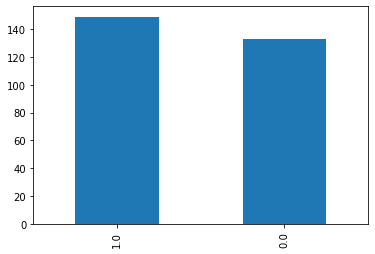

In [30]:
print('\nTarget variable distribution:\n', df_median['target'].value_counts())
df_median['target'].value_counts().plot.bar()

Tenemos clases bastante balanceadas, lo que significa que no necesitaremos hacer resampling. 

* Puede ser interesante ver si hay diferentes patrones de uso del programa y comparar si hay diferencias entre personas que usaran mucho el programa al principio del mes, o al final, o de forma constante. 

## Análisis de las variables independientes o *pedictores*

### Variables Categóricas

In [31]:
# Empezamos por las variables categóricas. Miramos cuántos valores únicos tienen
for col in columns_personal:
    print (f' column {col} unique values: ',  df[col].nunique())

 column country unique values:  43
 column industry unique values:  28
 column job_function unique values:  30
 column job_title unique values:  112


Las variables cualitativas tienen muchos valores diferentes; si algún nivel de una variable cualitativa tiene muy pocas observaciones en comparación con los demás niveles, es posible que durante el split de los datos alunga partición no contenga ninguna observación de dicho nivel, lo que puede generar errores. Por ello, vamos a analizar las diferentes variables categóricas para decidir qué estrategia seguir. 

In [32]:
# Miramos la distribución de los diferentes países
columns_personal['country'].value_counts()

United States         133
Germany                25
United Kingdom         21
Netherlands            16
India                   7
Canada                  5
Spain                   5
Brazil                  5
USA                     5
Ireland                 5
Australia               4
Chile                   4
Belgium                 4
Switzerland             4
US                      3
Mexico                  3
Malaysia                3
Colombia                2
Singapore               2
South Africa            2
Finland                 2
AE                      1
Israel                  1
Russia                  1
Romania                 1
CO                      1
Turkey                  1
FI                      1
Poland                  1
Cyprus                  1
Schweiz                 1
GB                      1
France                  1
Russian Federation      1
Denmark                 1
Bermuda                 1
Portugal                1
Costa Rica              1
Saudi Arabia

Vemos que:
* Hay países que aparecen varias veces con diferentes etiquetas: por ejemplo, tenemos United States, US, y USA.
* En comparación con USA, los demás países están infra-representados, por lo que es posible que el modelo considere USA como más predictivo. Como hay muchos más registros, es esperable que hayan muchos más usuarios que hayan comprado el producto que sean de USA. Sin embargo, ello puede representar un sesgo. 

Por ello, vamos a agrupar los registros. 

In [33]:
# Primero arreglamos las múltiples etiquetas de USA
usa = ['United States', 'US', 'USA']
columns_personal.loc[columns_personal['country'].isin(usa), 'country'] = 'United States'



In [34]:
# Agrupamos el resto de registros para corregir la sobrerepresentación de USA

columns_personal.loc[columns_personal['country'].isin(usa), 'country' ] = 'United States'
columns_personal.loc[~columns_personal['country'].isin(usa), 'country'] = 'Other'
columns_personal['country'].value_counts()

Other            141
United States    141
Name: country, dtype: int64

In [35]:
# Y lo mismo en el dataframe que conservamos entero
df_median.loc[df_median['country'].isin(usa), 'country'] = 'United States'
df_median.loc[~df_median['country'].isin(usa), 'country'] = 'Other'
df_median['country'].value_counts()

Other            141
United States    141
Name: country, dtype: int64

In [36]:
# Miramos la siguiente variable categórica
columns_personal['industry'].value_counts()

Healthcare/Pharmaceuticals/Biotech    78
Other                                 28
Business Services                     27
Software/Internet                     21
Education                             20
Financial Services                    18
Retail                                12
Manufacturing                         11
Media/Entertainment                   10
Consumer Services                      9
Computers/Electronics                  9
Government - Federal                   6
Non-Profit                             6
Energy/Utilities                       6
Telecommunications                     6
Transportation/Storage                 2
Agriculture/Mining                     2
Healthcare                             1
Real Estate/Construction               1
consumer_products                      1
Consulting                             1
Software                               1
energy_supply                          1
healthcare_pharma_biotech              1
Retail/Wholesale

In [37]:
#Hacemos una primera agrupación por tipo de industria

health = ['Healthcare/Pharmaceuticals/Biotech', 'Healthcare', 'healthcare_pharma_biotech']
gov = ['Government - Federal', 'Government - State/Local']
transport = ['Transportation/Storage', 'Shipping/Transport/Logistics', 'Wholesale/Distribution']
software_telecos = ['Software/Internet', 'Software', 'Computers/Electronics', 'Telecommunications']
consumer = ['Consumer Services', 'consumer_products']
energy = ['Energy/Utilities', 'energy_supply']
business = ['Business Services', 'Consulting']

columns_personal.loc[columns_personal['industry'].isin(health), 'industry'] = 'Healthcare/Pharma/Biotech'
columns_personal.loc[columns_personal['industry'].isin(gov), 'industry'] = 'Government'
columns_personal.loc[columns_personal['industry'].isin(transport), 'industry'] = 'Transport/Logistics'
columns_personal.loc[columns_personal['industry'].isin(software_telecos), 'industry'] = 'Software/Telecom'
columns_personal.loc[columns_personal['industry'].isin(consumer), 'industry'] = 'Consumer Services/Products'
columns_personal.loc[columns_personal['industry'].isin(energy), 'industry'] = 'Energy'
columns_personal.loc[columns_personal['industry'].isin(business), 'industry'] = 'Business Services'

columns_personal['industry'].value_counts()

Healthcare/Pharma/Biotech     80
Software/Telecom              37
Other                         28
Business Services             28
Education                     20
Financial Services            18
Retail                        12
Manufacturing                 11
Media/Entertainment           10
Consumer Services/Products    10
Energy                         7
Government                     7
Non-Profit                     6
Transport/Logistics            4
Agriculture/Mining             2
Real Estate/Construction       1
Retail/Wholesale               1
Name: industry, dtype: int64

In [38]:
# Vemos que siguen habiendo categorias muy minoritarias, por lo que optamos por moverlas a "Other"
indus = ['Energy', 'Government', 'Non-Profit', 'Transport/Logistics', 'Agriculture/Mining', 'Real Estate/Construction', 'Retail/Wholesale']
columns_personal.loc[columns_personal['industry'].isin(indus), 'industry'] = 'Other'

columns_personal['industry'].value_counts()


Healthcare/Pharma/Biotech     80
Other                         56
Software/Telecom              37
Business Services             28
Education                     20
Financial Services            18
Retail                        12
Manufacturing                 11
Media/Entertainment           10
Consumer Services/Products    10
Name: industry, dtype: int64

In [39]:
# Hacemos el mismo proceso con el dataframe completo
df_median.loc[df_median['industry'].isin(health), 'industry'] = 'Healthcare/Pharma/Biotech'
df_median.loc[df_median['industry'].isin(gov), 'industry'] = 'Government'
df_median.loc[df_median['industry'].isin(transport), 'industry'] = 'Transport/Logistics'
df_median.loc[df_median['industry'].isin(software_telecos), 'industry'] = 'Software/Telecom'
df_median.loc[df_median['industry'].isin(consumer), 'industry'] = 'Consumer Services/Products'
df_median.loc[df_median['industry'].isin(energy), 'industry'] = 'Energy'
df_median.loc[df_median['industry'].isin(business), 'industry'] = 'Business Services'
df_median.loc[df_median['industry'].isin(indus), 'industry'] = 'Other'

df_median['industry'].value_counts()


Healthcare/Pharma/Biotech     80
Other                         56
Software/Telecom              37
Business Services             28
Education                     20
Financial Services            18
Retail                        12
Manufacturing                 11
Media/Entertainment           10
Consumer Services/Products    10
Name: industry, dtype: int64

In [40]:
# Seguimos con la siguiente variable categórica. Las dos siguientes parecen estar muy relacionadas

print('\njob_function:\n', columns_personal['job_function'].value_counts())
print('\njob_title:\n', columns_personal['job_title'].value_counts())



job_function:
 Other                                           69
Data Scientist                                  58
Business Analyst                                40
IT-Data Scientist                               22
Business - Analyst                              10
IT-Architect                                     9
Academic-Researcher                              9
Business - Management                            7
Consultant                                       7
Researcher                                       6
Partner-Reseller                                 6
Partner-Technology                               5
Software Dev - Architect                         4
IT                                               4
Head of Analytics                                3
Software Dev - Developer                         3
biz_management                                   2
IT - Management                                  2
Business analyst                                 2
Research       

In [41]:
# columna job_title tiene 112 valores diferentes, lo cual la convierte en inmanejable. 
# Además, parece tener valores arbitrarios, como "Sr. Predictive Modeler"
# Optamos por quedarnos con job_function, en tanto que, lógicamente, debe de estar muy relacionadas

columns_personal = columns_personal.drop(['job_title'], axis = 1)
df_median = df_median.drop(['job_title'], axis = 1)

# Agrupamos los job_function por tipo de funciones. Vemos que hay varias etiquetas para una misma función
it = ['Software Dev - Other', 'IT-Architect', 'IT', 'Software Dev - Architect', 'Software Dev - Developer', 'IT - Management', 'IT - Other', 'IT Executive (Chief Data Officer, CIO, CTO)', 'IT: Management', 'IT - Project Management', 'Software Dev - Management']
manager = ['Business - Management', 'Consultant', 'biz_management', 'Management', 'Business Executive (CEO, CMO)' ]
data_science = ['Data Scientist', 'IT-Data Scientist']
analyst = ['Business analyst', 'Business Analyst', 'Business - Analyst', 'Head of Analytics', 'Analytics Executive (CAO, Head of Analytics)']
research = ['Academic-Researcher', 'Researcher', 'Research', 'Academic-Student']

columns_personal.loc[columns_personal['job_function'].isin(it), 'job_function'] = 'IT/Dev'
columns_personal.loc[columns_personal['job_function'].isin(manager), 'job_function'] = 'Management/Business'
columns_personal.loc[columns_personal['job_function'].isin(data_science), 'job_function'] = 'Data Science'
columns_personal.loc[columns_personal['job_function'].isin(analyst), 'job_function'] = 'Analytics'
columns_personal.loc[columns_personal['job_function'].isin(research), 'job_function'] = 'Research'

columns_personal['job_function'].value_counts()

Data Science           80
Other                  69
Analytics              57
IT/Dev                 29
Research               18
Management/Business    18
Partner-Reseller        6
Partner-Technology      5
Name: job_function, dtype: int64

In [42]:
# Asignamos las dos categorias minoritarias a "Other"

columns_personal.loc[columns_personal['job_function'] == 'Partner-Reseller', 'job_function'] = 'Other'
columns_personal.loc[columns_personal['job_function'] == 'Partner-Technology', 'job_function'] = 'Other'

# Y aplicamos el mismo proceso al dataframe completo

df_median.loc[df_median['job_function'].isin(it), 'job_function'] = 'IT/Dev'
df_median.loc[df_median['job_function'].isin(manager), 'job_function'] = 'Management/Business'
df_median.loc[df_median['job_function'].isin(data_science), 'job_function'] = 'Data Science'
df_median.loc[df_median['job_function'].isin(analyst), 'job_function'] = 'Analytics'
df_median.loc[df_median['job_function'].isin(research), 'job_function'] = 'Research'
df_median.loc[df_median['job_function'] == 'Partner-Reseller', 'job_function'] = 'Other'
df_median.loc[df_median['job_function'] == 'Partner-Technology', 'job_function'] = 'Other'

df_median['job_function'].value_counts()

Other                  80
Data Science           80
Analytics              57
IT/Dev                 29
Research               18
Management/Business    18
Name: job_function, dtype: int64

In [43]:
#Por último, creamos variables dummis para el posterior modelo

columns_personal = pd.get_dummies(columns_personal)
df_median = pd.get_dummies(df_median)
df_median.head()

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,starts_22day,starts_24day,starts_26day,starts_28day,starts_30day,FormC,VisitC,WebinarC,EventC,Form HandlerC,Landing PageC,Landing Page TrackerC,Page ViewC,Chat TranscriptC,Form TrackerC,Social Post ClickC,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data,countsum_pivot,countsum_radoop_extension,countsum_remove_attribute_range,countsum_remove_useless_attributes,countsum_rename,countsum_rename_by_generic_names,countsum_rename_by_replacing,countsum_replace_missing_values,countsum_sample,countsum_sample_stratified,countsum_select,countsum_select_subprocess,countsum_set_macro,countsum_set_parameters,countsum_sort,countsum_split_data,countsum_subprocess,countsum_support_vector_clustering,countsum_transpose,countsum_weight_related,countsum_x_prediction,countsum_compare_rocs,countsum_date_to_numerical,countsum_detect_outlier_cof,countsum_detect_outlier_densities,countsum_detect_outlier_distances,countsum_detect_outlier_lof,countsum_drop_uncertain_predictions,countsum_execute_process,countsum_group_models,countsum_intersect,countsum_replace,countsum_split_validation,countsum_store,countsum_support_vector_machine,countsum_trim,countsum_chaid,countsum_generate_nominal_data,countsum_jdbc_connectors_extension,countsum_apply_threshold,countsum_combine_performances,countsum_create_lift_chart,countsum_create_threshold,countsum_find_threshold,countsum_principal_component_analysis,countsum_rule_induction,countsum_sample_kennard_stone,countsum_select_recall,countsum_set_minus,countsum_date_to_nominal,countsum_com.aylien.textapi.rapidminer_extension,countsum_social_media_extension,countsum_text_extension,countsum_web_extension,countsum_weka_extension,countsum_anova,countsum_extract_performance,countsum_linear_discriminant_analysis,countsum_logistic_regression,countsum_naive_bayes_kernel,countsum_perceptron,countsum_performance_classification,countsum_quadratic_discriminant_analysis,countsum_regularized_discriminant_analysis,countsum_correlation_matrix,countsum_create_association_rules,countsum_fp_growth,countsum_productivity_extension,countsum_sample_bootstrapping,countsum_auto_mlp,countsum_bootstrapping_validation,countsum_de_pivot,countsum_discretize_by_bins,countsum_guess_types,countsum_k_medoids,countsum_neural_net,countsum_performance_regression,countsum_polynomial_regression,countsum_provide_macro_as_log_value,countsum_r_extension,countsum_random_forest,countsum_recall,countsum_remember,countsum_remove_correlated_attributes,countsum_replace_dictionary,countsum_series_extension,countsum_set_data,countsum_support_vector_machine_libsvm,countsum_top_down_clustering,countsum_agglomerative_clustering,countsum_default_model,countsum_decision_tree_multiway,c

### Variables Numéricas

In [44]:
# Empezamos por las columnas de acumulados

columns_accumulate.describe()

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,starts_22day,starts_24day,starts_26day,starts_28day,starts_30day
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,4.216312,5.237589,6.166667,7.120567,7.847518,8.521277,9.113475,9.953901,10.351064,10.762411,11.326241,11.890071,12.248227,12.801418,13.347518
std,7.263178,12.045153,15.851083,16.574849,17.223509,18.240229,18.936339,20.556181,21.231167,21.791072,22.724717,23.624253,24.837309,25.614642,26.782367
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.250000
50%,2.000000,3.000000,3.000000,3.500000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000
75%,5.000000,5.000000,6.000000,7.000000,8.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.750000,13.000000,13.000000,14.000000,14.000000
max,73.000000,175.000000,243.000000,248.000000,250.000000,261.000000,261.000000,273.000000,280.000000,281.000000,285.000000,290.000000,312.000000,312.000000,322.000000


<AxesSubplot:>

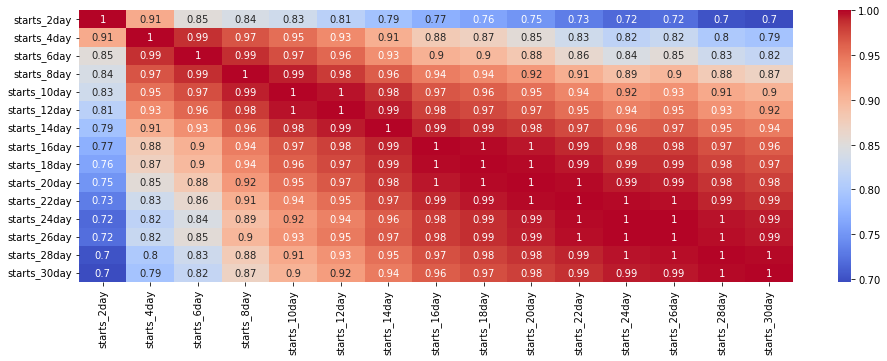

In [45]:
# Vemos que, igual que con las columnas de interacciones con el programa, hay datos extremos por el límite superior
# Es muy probable que todas las columnas correlacionen altamente con la última, starts_30day.
# lo comprobamos antes de eliminarlas

plt.figure(figsize = (16, 5))
sns.heatmap(columns_accumulate.corr(), annot = True, cmap='coolwarm')

In [46]:
# Efectivamente, cuanto más cercanas están en el tiempo las mediciones,más relacionadas están.
# Optamos por quedarnos sólo con la última columna, el acumulado de todo el mes


df_median.drop(df_median.iloc[:, 0:14], inplace = True, axis = 1)
df_median.head()

,starts_30day,FormC,VisitC,WebinarC,EventC,Form HandlerC,Landing PageC,Landing Page TrackerC,Page ViewC,Chat TranscriptC,Form TrackerC,Social Post ClickC,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data,countsum_pivot,countsum_radoop_extension,countsum_remove_attribute_range,countsum_remove_useless_attributes,countsum_rename,countsum_rename_by_generic_names,countsum_rename_by_replacing,countsum_replace_missing_values,countsum_sample,countsum_sample_stratified,countsum_select,countsum_select_subprocess,countsum_set_macro,countsum_set_parameters,countsum_sort,countsum_split_data,countsum_subprocess,countsum_support_vector_clustering,countsum_transpose,countsum_weight_related,countsum_x_prediction,countsum_compare_rocs,countsum_date_to_numerical,countsum_detect_outlier_cof,countsum_detect_outlier_densities,countsum_detect_outlier_distances,countsum_detect_outlier_lof,countsum_drop_uncertain_predictions,countsum_execute_process,countsum_group_models,countsum_intersect,countsum_replace,countsum_split_validation,countsum_store,countsum_support_vector_machine,countsum_trim,countsum_chaid,countsum_generate_nominal_data,countsum_jdbc_connectors_extension,countsum_apply_threshold,countsum_combine_performances,countsum_create_lift_chart,countsum_create_threshold,countsum_find_threshold,countsum_principal_component_analysis,countsum_rule_induction,countsum_sample_kennard_stone,countsum_select_recall,countsum_set_minus,countsum_date_to_nominal,countsum_com.aylien.textapi.rapidminer_extension,countsum_social_media_extension,countsum_text_extension,countsum_web_extension,countsum_weka_extension,countsum_anova,countsum_extract_performance,countsum_linear_discriminant_analysis,countsum_logistic_regression,countsum_naive_bayes_kernel,countsum_perceptron,countsum_performance_classification,countsum_quadratic_discriminant_analysis,countsum_regularized_discriminant_analysis,countsum_correlation_matrix,countsum_create_association_rules,countsum_fp_growth,countsum_productivity_extension,countsum_sample_bootstrapping,countsum_auto_mlp,countsum_bootstrapping_validation,countsum_de_pivot,countsum_discretize_by_bins,countsum_guess_types,countsum_k_medoids,countsum_neural_net,countsum_performance_regression,countsum_polynomial_regression,countsum_provide_macro_as_log_value,countsum_r_extension,countsum_random_forest,countsum_recall,countsum_remember,countsum_remove_correlated_attributes,countsum_replace_dictionary,countsum_series_extension,countsum_set_data,countsum_support_vector_machine_libsvm,countsum_top_down_clustering,countsum_agglomerative_clustering,countsum_default_model,countsum_decision_tree_multiway,countsum_random_clustering,countsum_adaboost,countsum_classification_by_regression,countsum_free_memory,countsum_impute_missing_values,countsum_materialize_data,countsum_text_to_n

In [47]:
columns_accumulate = columns_accumulate['starts_30day']

In [48]:
# Miramos el siguiente subconjunto de variables numéricas
columns_web.describe()

,FormC,VisitC,WebinarC,EventC,Form HandlerC,Landing PageC,Landing Page TrackerC,Page ViewC,Chat TranscriptC,Form TrackerC,Social Post ClickC
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,4.929078,15.202128,0.592199,0.148936,4.659574,0.758865,0.007092,1.386525,0.035461,0.067376,0.010638
std,7.875947,27.307363,1.301659,0.668947,7.551324,3.516915,0.084065,4.538828,0.203575,0.314081,0.132966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,19.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,63.000000,219.000000,7.000000,6.000000,51.000000,54.000000,1.000000,60.000000,2.000000,3.000000,2.000000


<AxesSubplot:>

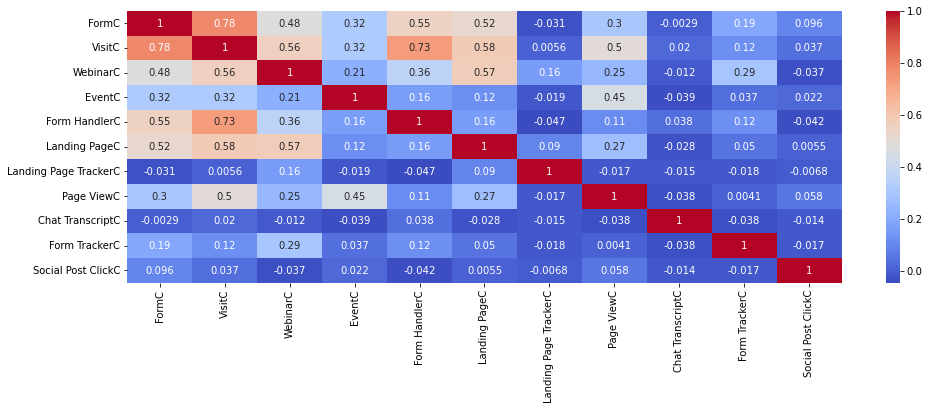

In [49]:
#De nuevo, hay varias columnas con valores extremos. Miramos las correlaciones entre ellas
plt.figure(figsize = (16, 5))
sns.heatmap(columns_web.corr(), annot = True, cmap='coolwarm')

No tenemos grandes correlaciones entre ellas, a excepción tal vex de visitC-FormC, y Form HandlerC-VisitC. no obstante, estás no llegan a 0.8, por lo que optamos por dejarlas como están, de momento. 

In [50]:
# Seguimos ocn el siguiente conjunto de variables numéricas
software1.describe()

,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,24.351064,9.734043,15.457447,11.851064,2.039007,0.673759,1.478723,2.652482,5.588652,2.070922,15.106383,11.687943,0.70922,1.031915,4.539007,1.592199,1.000000,7.336879,0.014184,9.195035,0.975177,0.904255,0.056738,0.095745,0.024823,0.698582,0.343972,0.007092,4.028369,0.631206,12.773050,0.585106,0.170213,0.524823,1.684397,0.744681,0.024823,0.783688,1.758865,1.829787,0.563830,0.234043,1.195035,1.890071,1.418440,0.421986,0.556738,0.053191,0.648936,0.244681
std,66.934829,28.464691,62.945946,74.603096,14.414130,3.714924,6.003668,12.700204,23.375801,15.080163,65.776144,54.459575,7.79455,7.427158,16.468677,6.734440,9.240172,29.007730,0.238197,54.349150,10.513307,7.142777,0.738114,1.490677,0.258838,7.677526,4.424791,0.119098,34.303532,7.306616,80.003102,6.912894,1.008557,3.515257,13.073963,6.151011,0.362014,4.734144,9.356445,13.630068,3.238641,1.533207,16.913878,13.017862,10.094681,2.706775,8.399626,0.513872,3.006662,1.265638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [51]:
# Para ver las correlaciones, puesto que tenemos muchas variables, vamos a seleciconar sólo la parte superior de la matriz,
# por encima de la diagonal

# Hacemos la matriz de correlación y la pasamos a valores absolutos. 
cor_matrix = software1.corr().abs()

# Seleccionamos los valores por encima de la diagonal:
# buscando los "1", la diagonal, 
# y pasando a booleanos todos los valores por encima diagonal a booleanos. Los valores por debajo apareceran como NaN
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# y por último, seleccionamos una variable de los pares de variables con una correlación superior a 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['countsum_aggregate', 'countsum_dbscan', 'countsum_extract_log_value', 'countsum_generate_copy', 'countsum_generate_macro', 'countsum_order_attributes']


Vemos que:
* Dentro de un pequeño subconjunto de variables de interacciones con el software, tenemos un número considerables de correlaciones por encima del 0.90. Esto tiene sentido, puesto que la mayoría de usuarios realizarán ciertas acciones conjuntamente en función de las necesidades de la tarea que estén desarrollando. 
* No obstante, ahora que hemos eliminado la mayor parte de las variables claramente redundantes, y que tenemos las variables dummies para los datos categóricos, vamos a analizar las correlaciones de todo el dataset en su conjunto antes de seguir eliminando variables. 

## Análisis de correlaciones y selección de variables

In [52]:
# Aplicamos el mismo proceso que anteriormente, pero vamos a ser más conservadores
# Seleccionando sólo las correlaciones por encima de 0.95 inicialmente

cor_matrix = df_median.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

['countsum_dbscan',
 'countsum_extract_log_value',
 'countsum_generate_macro',
 'countsum_order_attributes',
 'countsum_select_subprocess',
 'countsum_drop_uncertain_predictions',
 'countsum_execute_process',
 'countsum_intersect',
 'countsum_combine_performances',
 'countsum_sample_kennard_stone',
 'countsum_select_recall',
 'countsum_perceptron',
 'countsum_fp_growth',
 'countsum_auto_mlp',
 'countsum_bootstrapping_validation',
 'countsum_performance_regression',
 'countsum_provide_macro_as_log_value',
 'countsum_r_extension',
 'countsum_random_forest',
 'countsum_set_data',
 'countsum_support_vector_machine_libsvm',
 'countsum_agglomerative_clustering',
 'countsum_impute_missing_values',
 'countsum_create_formula',
 'countsum_generate_transaction_data',
 'countsum_set_macros',
 'countsum_work_on_subset',
 'countsum_k_means_kernel',
 'countsum_performance_support_vector_count',
 'countsum_cartesian_product',
 'countsum_execute_program',
 'countsum_execute_script',
 'countsum_fill_dat

In [53]:
# Vemos que tenemos 80 variables que podríamos eliminar por presentar correlaciones de Pearson > 0.95
len(to_drop)

80

Hemos visto que:
* Hay 80 columnas que podemos eliminar por presentar coeficientes de correlación superiores a 0.95.
* Dentro del conjunto de variable se encuentra *country_United States*: 
   * Vemos qe esta variable está altamente correlacionada con *start_30day*, que representa el total de veces que cada usuarios ha abierto el programa en un mes.
   * previamente hemos balanceado la representación de USa en el dataset, pasando todo el resto de países a *Other*. Por tanto, es poco probable que United States salga como altamente correlacionado con la anterior variable por sobre-representación. 
   * Es posible, pues, que los usuarios de USa hayan abierto significativamente más veces el programa, y por tanto es posible también que lo hayan comprado más. Así, la columna *country_United States* no sería una variable contaminante, sino una variable potencialmente explicativa.
* Así, decidimos eliminar todas las variables seleccionadas menos *country_United States*

In [54]:
# Sacamos country_United States de la lista de variables a eliminar
to_drop.remove('country_United States')
print('Nº of columns to drop: ', len(to_drop))
to_drop

Nº of columns to drop:  79


['countsum_dbscan',
 'countsum_extract_log_value',
 'countsum_generate_macro',
 'countsum_order_attributes',
 'countsum_select_subprocess',
 'countsum_drop_uncertain_predictions',
 'countsum_execute_process',
 'countsum_intersect',
 'countsum_combine_performances',
 'countsum_sample_kennard_stone',
 'countsum_select_recall',
 'countsum_perceptron',
 'countsum_fp_growth',
 'countsum_auto_mlp',
 'countsum_bootstrapping_validation',
 'countsum_performance_regression',
 'countsum_provide_macro_as_log_value',
 'countsum_r_extension',
 'countsum_random_forest',
 'countsum_set_data',
 'countsum_support_vector_machine_libsvm',
 'countsum_agglomerative_clustering',
 'countsum_impute_missing_values',
 'countsum_create_formula',
 'countsum_generate_transaction_data',
 'countsum_set_macros',
 'countsum_work_on_subset',
 'countsum_k_means_kernel',
 'countsum_performance_support_vector_count',
 'countsum_cartesian_product',
 'countsum_execute_program',
 'countsum_execute_script',
 'countsum_fill_dat

In [55]:
# guardamos una copia del dataframe sin las variables seleccionadas

df_short = df_median.copy()
df_short = df_short.drop(to_drop, axis=1)
print('shape of shortened dataframe: ', df_short.shape)
df_short.info()

shape of shortened dataframe:  (282, 207)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 1 to 331
Columns: 207 entries, starts_30day to job_function_Research
dtypes: float64(177), int64(12), uint8(18)
memory usage: 423.6 KB


In [56]:
# Para terminar el proceso de limpieza, vamos a guardar los dos dataframes que tenemos usando pickle
# Primero renombramos para mayor claridad:

df_long = df_median

with open('PQL_cleaned_long.pkl', 'wb') as f:
    pickle.dump(df_long, f)
with open('PQL_cleaned_short.pkl', 'wb') as f:
    pickle.dump(df_short, f)

# Muestreo

In [57]:
# Aislamos nuestra variable dependiente
y_short = df_short.pop('target')
y_long = df_long.pop('target')

print(y_short.shape)
print(y_long.shape)

(282,)
(282,)


In [58]:
# Dividimos los dos dataframes en train y test, vamos a usar 80% para entrenamiento y 20% para testeo

X_train_short, X_test_short, y_train_short, y_test_short = train_test_split (df_short, y_short, test_size=0.2, random_state=SEED)

X_train_long, X_test_long, y_train_long, y_test_long = train_test_split (df_long, y_long, test_size=0.2, random_state=SEED)

In [59]:
X_train_short.shape

(225, 206)

In [60]:
# Puesto que tenemos variables con rangos muy dispares, normalizamos los datos

normalizacion_short = StandardScaler().fit(X_train_short)
X_train_short = normalizacion_short.transform(X_train_short)

normalizacion_long = StandardScaler().fit(X_train_long)
X_train_long = normalizacion_long.transform(X_train_long)

# Modelos

## Regresión Logística

### Entrenamiento 

In [61]:
# Definimos nuestro modelo y lo aplicamos a los datos train del dataframe reducido

lr_short = LogisticRegression()

lr_short = lr_short.fit(X_train_short, y_train_short)

In [62]:
# Vemos la media de accuracy del modelo
lr_short.score(X_train_short, y_train_short)

0.8488888888888889

### Evaluación del modelo

In [63]:
# Normalizamos los datos
X_test_short = normalizacion_short.transform(X_test_short)

In [64]:
# Aplicamos el modelo
lr_short_predictions = lr_short.predict(X_test_short)
lr_short_predictions

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1.])

In [65]:
# Miramos las métricas de neustro modelo

print('Logistic Regression Score: ', lr_short.score(X_test_short, y_test_short))
print('Logistic Regression ROC-AUC: ', metrics.roc_auc_score(y_test_short, lr_short_predictions))
print('Logistic Regression Accuracy: ', metrics.accuracy_score(y_test_short, lr_short_predictions))
print('Logistic Regression Precision: ', metrics.precision_score(y_test_short, lr_short_predictions))
print('Logistic Regression Recall: ', metrics.recall_score(y_test_short, lr_short_predictions))
print('Logistic Regression F-1 Score: ', metrics.f1_score(y_test_short, lr_short_predictions))

Logistic Regression Score:  0.5614035087719298
Logistic Regression ROC-AUC:  0.6052631578947368
Logistic Regression Accuracy:  0.5614035087719298
Logistic Regression Precision:  0.782608695652174
Logistic Regression Recall:  0.47368421052631576
Logistic Regression F-1 Score:  0.5901639344262294


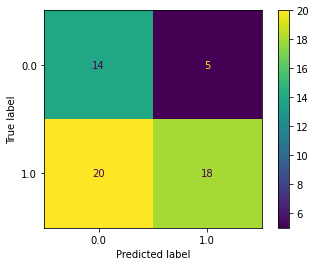

In [66]:
cm = confusion_matrix(y_test_short, lr_short_predictions, labels=lr_short.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_short.classes_)
disp.plot()

plt.show()

Por los resultados vemos que:
* tenemos un sobre-ajuste brutal, con un score mucho más bajo en los datos test que en los datos train
*  Tenemos una recall inferior 50%, muy baja, y de hecho podemos ver que, para la clase positiva, ha clasificado bien la menos mitad de los registros (peor que azar), y en cambio para la clase negativa 60%. 
* La precision es bastante aceptable, del 78%, aunque parece que únicamente para la predicciones de clase positiva, puesto que las predicciones de clase negativa tienen más errores que aciertos debido a un número muy elevado de falsos negativos(20). Esto es, podemos estar seguros a un 78% de que los usuarios que clasifica como potenciales clientes probablemente lo sean. 
* Tenemos muchos falsos negativos (más de la mitad de todos los casos positivos), lo cuál no es bueno.
* En cambio, tenemos muy pocos falsos positivos (5).
* En conjunto, esto significa que podemos confiar bastante en las predicciones que nuestro modelo haga como potenciales clientes, pero podemos confiar bastante menos de los que deje fuera. Dicho de otro modo, el modelo no reconoce lo suficiente a la clase positiva. 

En difinitiva, no es un buen modelo. Vamos a intentar rebajar el sobre-ajuste con un cross_validation.

In [67]:
# Aplicamos un cross_validation para evaluar el modelo, con un número de iteraciones = 10
scores = cross_val_score(lr_short, df_short, y_short, cv=10)

print("%0.2f Accuracy con una desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.64 Accuracy con una desviación estándar de 0.08


In [68]:
scores = cross_val_score(lr_short, df_short, y_short, cv=10)
print("%0.2f Accuracy con una desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.64 Accuracy con una desviación estándar de 0.08


Hemos mejorado un poco la accuracy del modelo, pero aun así sigue siendo baja.

Probamos con el dataframe completo

In [69]:
# Definimos el modelo
lr_long = LogisticRegression()

lr_long = lr_long.fit(X_train_long, y_train_long)
lr_long.score(X_train_long, y_train_long)

0.8444444444444444

In [70]:
# Lo entrenamos
X_test_long = normalizacion_long.transform(X_test_long)

lr_long_predictions = lr_long.predict(X_test_long)
lr_long_predictions

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1.])

In [71]:
print('Score: ', lr_long.score(X_test_long, y_test_long))
print('ROC-AUC: ', metrics.roc_auc_score(y_test_long, lr_long_predictions))
print('Accuracy: ', metrics.accuracy_score(y_test_long, lr_long_predictions))
print('Precision: ', metrics.precision_score(y_test_long, lr_long_predictions))
print('Recall: ', metrics.recall_score(y_test_long, lr_long_predictions))
print('F-1 Score: ', metrics.f1_score(y_test_long, lr_long_predictions))

Score:  0.6140350877192983
ROC-AUC:  0.6578947368421052
Accuracy:  0.6140350877192983
Precision:  0.8333333333333334
Recall:  0.5263157894736842
F-1 Score:  0.6451612903225806


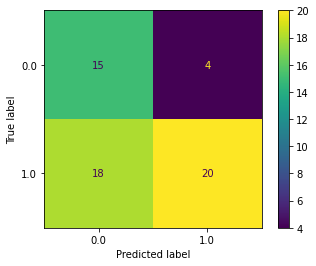

In [72]:
cm = confusion_matrix(y_test_long, lr_long_predictions, labels=lr_long.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_long.classes_)
disp.plot()

plt.show()

Vemos que, curiosamente, usando el dataframe con muchas columnas correlacionadas:
* Hemos mejorado un poco el modelo en todas las métricas. 
* Hemos reducido un poco el ajuste.
* Aún así, seguimos teniendo demasiados falsos negativos (18 sobre 38)

Vamos a probar usando menos datos para entrenamiento.

In [73]:
# Dividimos los dos dataframes en train y test, vamos a usar 60% para entrenamiento y 40% para testeo

X_train_short, X_test_short, y_train_short, y_test_short = train_test_split (df_short, y_short, test_size=0.4, random_state=SEED)

X_train_long, X_test_long, y_train_long, y_test_long = train_test_split (df_long, y_long, test_size=0.4, random_state=SEED)

In [74]:
# Normalizamos los datos

normalizacion_short = StandardScaler().fit(X_train_short)
X_train_short = normalizacion_short.transform(X_train_short)

normalizacion_long = StandardScaler().fit(X_train_long)
X_train_long = normalizacion_long.transform(X_train_long)

In [75]:
# Volvemos a entrenar el modelo
lr_short = lr_short.fit(X_train_short, y_train_short)
lr_short.score(X_train_short, y_train_short)

0.8461538461538461

In [76]:
# Aplicamos el modelo el vemos los resultados
X_test_short = normalizacion_short.transform(X_test_short)
lr_short_predictions = lr_short.predict(X_test_short)

print('Logistic Regression Score: ', lr_short.score(X_test_short, y_test_short))
print('Logistic Regression ROC-AUC: ', metrics.roc_auc_score(y_test_short, lr_short_predictions))
print('Logistic Regression Accuracy: ', metrics.accuracy_score(y_test_short, lr_short_predictions))
print('Logistic Regression Precision: ', metrics.precision_score(y_test_short, lr_short_predictions))
print('Logistic Regression Recall: ', metrics.recall_score(y_test_short, lr_short_predictions))
print('Logistic Regression F-1 Score: ', metrics.f1_score(y_test_short, lr_short_predictions))

Logistic Regression Score:  0.6283185840707964
Logistic Regression ROC-AUC:  0.6388708630759248
Logistic Regression Accuracy:  0.6283185840707964
Logistic Regression Precision:  0.7358490566037735
Logistic Regression Recall:  0.582089552238806
Logistic Regression F-1 Score:  0.65


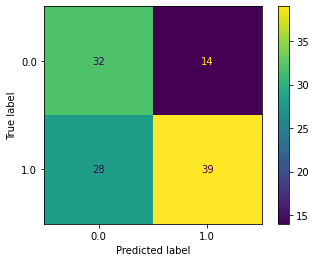

In [77]:
cm = confusion_matrix(y_test_short, lr_short_predictions, labels=lr_short.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_short.classes_)
disp.plot()

plt.show()

In [78]:
# Probamos con el dataframe completo

lr_long = lr_long.fit(X_train_long, y_train_long)
X_test_long = normalizacion_long.transform(X_test_long)

lr_long_predictions = lr_long.predict(X_test_long)

print('Score in train: ', lr_long.score(X_train_long, y_train_long))
print('Score: ', lr_long.score(X_test_long, y_test_long))
print('ROC-AUC: ', metrics.roc_auc_score(y_test_long, lr_long_predictions))
print('Accuracy: ', metrics.accuracy_score(y_test_long, lr_long_predictions))
print('Precision: ', metrics.precision_score(y_test_long, lr_long_predictions))
print('Recall: ', metrics.recall_score(y_test_long, lr_long_predictions))
print('F-1 Score: ', metrics.f1_score(y_test_long, lr_long_predictions))


Score in train:  0.8402366863905325
Score:  0.672566371681416
ROC-AUC:  0.6829980532121999
Accuracy:  0.672566371681416
Precision:  0.7777777777777778
Recall:  0.6268656716417911
F-1 Score:  0.694214876033058


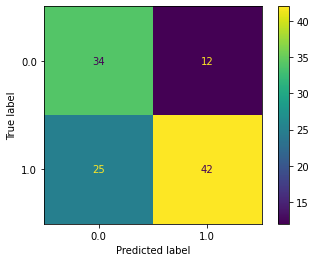

In [79]:
cm = confusion_matrix(y_test_long, lr_long_predictions, labels=lr_long.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_long.classes_)
disp.plot()

plt.show()

Vemos que:
* El mejor modelo es la regresión logística con el dataframe sin columnas correlacionadas por encima del 0.95 y entrenado con un 60% de los datos. 
    * Es cierto que los resultados con el dataframe completo son un poco mejores, pero es muy dudoso trabajar con columnas tan correlacionadas (por encima de 0.95).
    * Sigue teniendo un sobre-ajuste muy elevado 
    * Hemos conseguido aumentar el recall de la lase positiva, sin aumentar demasiado los falsos positivos (como ocurre con el dataframe completo). 
    * La precision sigue siendo elevada (0.73)

Por lo que podemos ver del modelo con todo el dataframe, el modelo está clasificando practicamente todos los registros como positivos, lo cual genera un elevado número de falsos positivos que no es aceptable. 

En definitima, hemos mejorado un poco el modelo usando el dataframe reducido y con entrenamiento al 60%.

Vamos a probar otro algoritmo

## Decision Tree

In [80]:
# Definimos el modelo, elegimos 10 nodos
dt = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = SEED)

In [81]:
# Lo aplicamos a los datos de entrenamiento
dt.fit(X_train_short, y_train_short)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=50)

In [82]:
print('Decision tree Score in training: ', dt.score(X_train_short, y_train_short))

Decision tree Score in training:  0.8165680473372781


In [83]:
# Lo aplicamos a los datos test
normalizacion_short.transform(X_test_short)
dt_predictions = dt.predict(X_test_short)

print('Decision Tree Score: ', dt.score(X_test_short, y_test_short))
print('Decision Tree ROC-AUC: ', metrics.roc_auc_score(y_test_short, dt_predictions))
print('Decision Tree Accuracy: ', metrics.accuracy_score(y_test_short, dt_predictions))
print('Decision Tree Precision: ', metrics.precision_score(y_test_short, dt_predictions))
print('Decision Tree Recall: ', metrics.recall_score(y_test_short, dt_predictions))
print('Decision Tree F-1 Score: ', metrics.f1_score(y_test_short, dt_predictions))

Decision Tree Score:  0.6902654867256637
Decision Tree ROC-AUC:  0.6945165476963011
Decision Tree Accuracy:  0.6902654867256637
Decision Tree Precision:  0.7758620689655172
Decision Tree Recall:  0.6716417910447762
Decision Tree F-1 Score:  0.7200000000000001


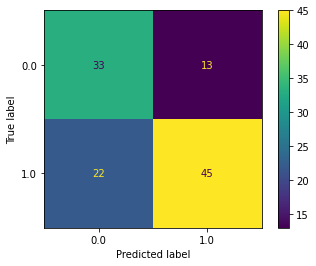

In [84]:
cm = confusion_matrix(y_test_short, dt_predictions, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

plt.show()

Con el Decision Tree, respecto a la regresión logística, obtenemos que:
* Hemos ganado 4 puntos en precision (77 vs 73), por lo que tenemos menos falsos positivos. 
* Y hemos ganado 9 puntos de recall (67 vs 58): hemos aumentado el número de verdaderos positivos detectados 
* También reducido el número de falsos negativos (22 vs 28). 
* Seguimos teniendo un sobre-ajuste elevado: media de accuracy de 0.81 en entrenamiento -vs- 0.69 en test.

Por tanto, este es el mejor modelo entrenado hasta el momento.

## Random Forest 

In [85]:
# Definimos el modelo y lo aplicamos a los datos de entrenamiento

rf = RandomForestClassifier(max_leaf_nodes = 10, random_state = SEED)

rf.fit(X_train_short, y_train_short)
rf.score(X_train_short, y_train_short)

0.834319526627219

In [86]:
# Y lo aplicamos a los datos de entrenamiento
normalizacion_short.transform(X_test_short)
rf_predictions = rf.predict(X_test_short)

print('Random Forest Score: ', rf.score(X_test_short, y_test_short))
print('Random Forest ROC-AUC: ', metrics.roc_auc_score(y_test_short, rf_predictions))
print('Random Forest Accuracy: ', metrics.accuracy_score(y_test_short, rf_predictions))
print('Random Forest Precision: ', metrics.precision_score(y_test_short, rf_predictions))
print('Random Forest Recall: ', metrics.recall_score(y_test_short, rf_predictions))
print('Random Forest F-1 Score: ', metrics.f1_score(y_test_short, rf_predictions))

Random Forest Score:  0.6460176991150443
Random Forest ROC-AUC:  0.6708306294613887
Random Forest Accuracy:  0.6460176991150443
Random Forest Precision:  0.8
Random Forest Recall:  0.5373134328358209
Random Forest F-1 Score:  0.6428571428571428


Vemos que tenemos peores resultados, con un mayor sobre-ajuste y menos recall que con el decision tree. 

Vamos a probar reduciendo el número de nodos.

In [87]:
# Re-definimos el modelo y lo aplicamos a los datos de entrenamiento

rf = RandomForestClassifier(max_leaf_nodes = 5, random_state = SEED)

rf.fit(X_train_short, y_train_short)
rf.score(X_train_short, y_train_short)

0.7869822485207101

In [88]:
normalizacion_short.transform(X_test_short)
rf_predictions = rf.predict(X_test_short)

print('Random Forest Score: ', rf.score(X_test_short, y_test_short))
print('Random Forest ROC-AUC: ', metrics.roc_auc_score(y_test_short, rf_predictions))
print('Random Forest Accuracy: ', metrics.accuracy_score(y_test_short, rf_predictions))
print('Random Forest Precision: ', metrics.precision_score(y_test_short, rf_predictions))
print('Random Forest Recall: ', metrics.recall_score(y_test_short, rf_predictions))
print('Random Forest F-1 Score: ', metrics.f1_score(y_test_short, rf_predictions))

Random Forest Score:  0.6283185840707964
Random Forest ROC-AUC:  0.6524983776768333
Random Forest Accuracy:  0.6283185840707964
Random Forest Precision:  0.7777777777777778
Random Forest Recall:  0.5223880597014925
Random Forest F-1 Score:  0.625


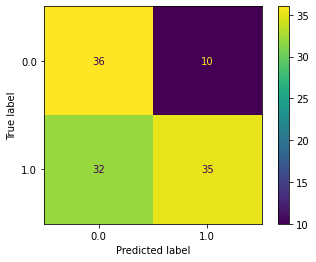

In [89]:
cm = confusion_matrix(y_test_short, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

Reduciendo los nodos hemos rebajado un poco el sobre-ajuste, pero el tendimiento sigue siendo peor que en el decision tree. 

## Aplicación a los datos predict 

In [90]:
# Cargamos los datos

df_predict = pd.read_excel('data_PQLpredict.xlsx', header = 0)

In [91]:
df_predict.head()

,starts_2day,starts_4day,starts_6day,starts_8day,starts_10day,starts_12day,starts_14day,starts_16day,starts_18day,starts_20day,starts_22day,starts_24day,starts_26day,starts_28day,starts_30day,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,starts_24day_Delta,starts_26day_Delta,starts_28day_Delta,starts_30day_Delta,FormC,VisitC,WebinarC,EventC,Form HandlerC,Landing PageC,Landing Page TrackerC,Page ViewC,Chat TranscriptC,Form TrackerC,Social Post ClickC,Paid Search AdC,VideoC,country,industry,job_function,job_title,countsum_retrieve,countsum_apply_model,countsum_filter_examples,countsum_join,countsum_nominal_conversion,countsum_numerical_conversion,countsum_parallel_decision_tree,countsum_performance,countsum_read_data_operators,countsum_remove_duplicates,countsum_select_attributes,countsum_set_role,countsum_union,countsum_write_data_operators,countsum_x_validation,countsum_decision_tree,countsum_filter_example_range,countsum_multiply,countsum_namsor_extension,countsum_aggregate,countsum_append,countsum_branch,countsum_cluster_distance_performance,countsum_dbscan,countsum_discretize_by_size,countsum_discretize_by_user_specification,countsum_exchange_roles,countsum_extract_log_value,countsum_extract_macro,countsum_generate_aggregation,countsum_generate_attributes,countsum_generate_copy,countsum_generate_data,countsum_generate_data_user_specification,countsum_generate_id,countsum_generate_macro,countsum_irbrecommender_extension,countsum_k_means,countsum_k_nn,countsum_linear_regression,countsum_log,countsum_log_to_data,countsum_loop_related,countsum_naive_bayes,countsum_normalize,countsum_optimizaiton_operators,countsum_order_attributes,countsum_parse_numbers,countsum_performance_binominal_classification,countsum_performance_to_data,countsum_pivot,countsum_radoop_extension,countsum_remove_attribute_range,countsum_remove_useless_attributes,countsum_rename,countsum_rename_by_generic_names,countsum_rename_by_replacing,countsum_replace_missing_values,countsum_sample,countsum_sample_stratified,countsum_select,countsum_select_subprocess,countsum_set_macro,countsum_set_parameters,countsum_sort,countsum_split_data,countsum_subprocess,countsum_support_vector_clustering,countsum_transpose,countsum_weight_related,countsum_x_prediction,countsum_compare_rocs,countsum_date_to_numerical,countsum_detect_outlier_cof,countsum_detect_outlier_densities,countsum_detect_outlier_distances,countsum_detect_outlier_lof,countsum_drop_uncertain_predictions,countsum_execute_process,countsum_group_models,countsum_intersect,countsum_replace,countsum_split_validation,countsum_store,countsum_support_vector_machine,countsum_trim,countsum_chaid,countsum_generate_nominal_data,countsum_jdbc_connectors_extension,countsum_apply_threshold,countsum_combine_performances,countsum_create_lift_chart,countsum_create_threshold,countsum_find_threshold,countsum_principal_component_analysis,countsum_rule_induction,countsum_sample_kennard_stone,countsum_select_recall,countsum_set_minus,countsum_date_to_nominal,countsum_stream_database,countsum_com.aylien.textapi.rapidminer_extension,countsum_generate_churn_data,countsum_generate_multi_label_data,countsum_social_media_extension,countsum_text_extension,countsum_web_extension,countsum_weka_extension,countsum_anova,countsum_extract_performance,countsum_linear_discriminant_analysis,countsum_logistic_regression,countsum_naive_bayes_kernel,countsum_perceptron,countsum_performance_classification,countsum_quadratic_discriminant_analysis,countsum_regularized_discriminant_analysis,countsum_correlation_matrix,countsum_create_association_rules,countsum_fp_growth,countsum_productivity_extension,countsum_sample_bootstrapping,countsum_auto_mlp,countsum_bootstrapping_validation,countsum_de_pivot,countsum_discretize_by_bins,countsum_guess_types,countsum_k_medoids,countsum_neural_net,countsum_performance_regressio

In [92]:
# Vemos que tenemos una columna "Unnamed: 306". Vamos a ver qué contiene

df_predict['Unnamed: 306'].value_counts()

Series([], Name: Unnamed: 306, dtype: int64)

In [93]:
# Parece estar vacía. Lo comprobamos

print(len(df_predict))
print(df_predict['Unnamed: 306'].isnull().sum())

49
49


Efectivamente, está vacía. Puede que sea para las predicciones, pero en cualquier caso, la eliminamos y las añadiremos después.

In [94]:
df_predict = df_predict.drop('Unnamed: 306', axis=1)

# Establecemos el id como índice
df_predict = df_predict.set_index('id')

# Eliminamos todas las variables que habíamos eliminado en entrenamiento (recuento y máximo cero)

df_predict = df_predict.drop(deltas, axis=1)
df_predict = df_predict.drop(columns_zero, axis = 1)

In [95]:
# Completamos nulos por la mediana
df_predict = df_predict.fillna(df_predict.median())
df_predict.isnull().sum()

starts_2day                 0
starts_4day                 0
starts_6day                 0
starts_8day                 0
starts_10day                0
                           ..
failure_ratio               0
runtime_exception_ratio     0
user_error_ratio            0
operator_exception_ratio    0
stopped_ratio               0
Length: 285, dtype: int64

In [96]:
# Agrupamos las variables categóricas

df_predict.loc[df_predict['country'].isin(usa), 'country'] = 'United States'
df_predict.loc[~df_predict['country'].isin(usa), 'country'] = 'Other'
df_predict.loc[df_predict['industry'].isin(health), 'industry'] = 'Healthcare/Pharma/Biotech'
df_predict.loc[df_predict['industry'].isin(gov), 'industry'] = 'Government'
df_predict.loc[df_predict['industry'].isin(transport), 'industry'] = 'Transport/Logistics'
df_predict.loc[df_predict['industry'].isin(software_telecos), 'industry'] = 'Software/Telecom'
df_predict.loc[df_predict['industry'].isin(consumer), 'industry'] = 'Consumer Services/Products'
df_predict.loc[df_predict['industry'].isin(energy), 'industry'] = 'Energy'
df_predict.loc[df_predict['industry'].isin(business), 'industry'] = 'Business Services'
df_predict.loc[df_predict['industry'].isin(indus), 'industry'] = 'Other'
df_predict.loc[df_predict['job_function'].isin(it), 'job_function'] = 'IT/Dev'
df_predict.loc[df_predict['job_function'].isin(manager), 'job_function'] = 'Management/Business'
df_predict.loc[df_predict['job_function'].isin(data_science), 'job_function'] = 'Data Science'
df_predict.loc[df_predict['job_function'].isin(analyst), 'job_function'] = 'Analytics'
df_predict.loc[df_predict['job_function'].isin(research), 'job_function'] = 'Research'
df_predict.loc[df_predict['job_function'] == 'Partner-Reseller', 'job_function'] = 'Other'
df_predict.loc[df_predict['job_function'] == 'Partner-Technology', 'job_function'] = 'Other'
df_predict = df_predict.drop(['job_title'], axis = 1)


In [97]:
# y las pasamos a dummies
df_predict = pd.get_dummies(df_predict)

In [98]:
# Eliminamos las variables de acumulados excepto la última

df_predict.drop(df_predict.iloc[:, 0:14], inplace = True, axis = 1)

In [99]:
# Eliminamos las variables correlacionadas
df_predict = df_predict.drop(to_drop, axis=1)


In [100]:
# y comprobamos que la shape es correcta
print(df_predict.shape)
print(df_short.shape)

(49, 209)
(282, 206)


In [101]:
# Vemos que nos sobran tres variables, vamos a ver qué ha pasado
short = list(df_short.columns)
predict = list(df_predict.columns)
dif = np.setdiff1d(predict,short)
dif

array(['industry_it_software', 'job_function_IT - Data Architect',
       'job_function_IT: Data architect'], dtype='<U48')

In [102]:
# Parece que tenemos otros tres job_function que no hemos clasificado. Las asignamos a sus agrupaciones correspondientes

df_predict['industry_Software/Telecom'] = df_predict['industry_Software/Telecom'] + df_predict['industry_it_software']
df_predict['job_function_IT/Dev'] = df_predict['job_function_IT/Dev'] + df_predict['job_function_IT - Data Architect'] + df_predict['job_function_IT: Data architect']

# y eliminamos las originales
df_predict = df_predict.drop(['industry_it_software', 'job_function_IT - Data Architect', 'job_function_IT: Data architect'], axis = 1)
df_predict.shape

(49, 206)

In [103]:
# Y aplicamos el modelo, primero normalizando los datos

df_predict = normalizacion_short.transform(df_predict)
predictions = dt.predict(df_predict)

predictions


array([0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.])

# Conclusiones

* El modelo que mejor ha funcionado ha sido el Decision Tree, con un accuracy de 69%, una precision de 77% y un recall de 67%. 
* No obstante, todos los modelos dan un overfitting muy elevado, a pesar de que se ha intentado rebajar disminuyendo la porporción de datos empleados para entrenamiento (60%). 
* Tenemos asimismo un número considerable de falsos negativos (22 de 67), frente a 13 falsos positivos. 
* El proceso de limpieza de datos ha sido trabajoso debido a la gran cantidad de variables que contiene el dataset: hemos eliminado muchas columnas correlacionadas y agrupado columnas categóricas. 
* Tal vez el rendimiento mediocre de los modelos se deba a la escasa cantidad de registros del dataset. 
